# Assignment-2

**Due Date:** 16.11.2022 

---------------------------------------

**Instructor:** Erkut Erdem

**TA:** Sibel Kapan

---------------------------------------

**Student:** Sare Naz Ersoy

**Github Classroom:** https://classroom.github.com/a/G-DSs1pj



## Part II: Book Genre Classification with Naive Bayes


### Dataset Upload

Dataset uploaded from Drive or local

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
import re
import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from datetime import datetime
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk import word_tokenize, sent_tokenize
from sklearn.metrics import classification_report

### Dataset Description

• It contains 21079 book information on each line.

• I will use 80% for training and the remainder for test.

• A line in the file is organized in columns:

– Column 0: title

– Column 1: author

– Column 2: description

– Column 3: coverImg

– Column 4: genre

• A tab separates each column

• Book genres are Young Adult, Fantasy, Classics, Science Fiction, Fiction, Horror, Romance, Mystery, History, Thriller.
### PART1
I  will be predicting the genre of a book by the book’s description. It can be feasible with counting the number of related words in book description and match with their genre. For example, 'life', 'new','world', 'secret', 'time', 'man', 'year', 'thriller', 'killer', 'woman' word are the most frequent words in Thriller category (after data cleaning and stop words cleaning )and like 'secret', 'killer' words can be distinguishing in that case.
You will see the frequencies below but I want to show the thriller's word frequencies for now.


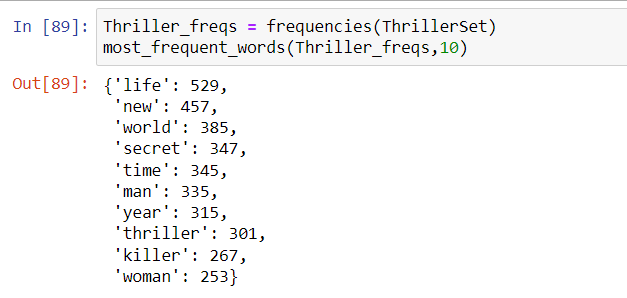
### Data Visualization

In [2]:
#Using the pandas framework a dataset is created using the "book_dataset_a2.csv" file.
data=pd.read_csv('book_dataset_a2.csv', delimiter="\t")

In [3]:
#Displaying dataset
data.head(5)

,title,author,description,coverImg,genre
0,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,https://i.gr-assets.com/images/S/compressed.ph...,Young Adult
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",There is a door at the end of a silent corrido...,https://i.gr-assets.com/images/S/compressed.ph...,Fantasy
2,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,https://i.gr-assets.com/images/S/compressed.ph...,Classics
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",Alternate cover edition of ISBN 9780679783268S...,https://i.gr-assets.com/images/S/compressed.ph...,Classics
4,Twilight,Stephenie Meyer,About three things I was absolutely positive.\...,https://i.gr-assets.com/images/S/compressed.ph...,Young Adult


In [4]:
data.columns

Index(['title', 'author', 'description', 'coverImg', 'genre'], dtype='object')

In [5]:
#Group our dataset by "genre" and see that we have 21079 book rows dedicated to each of the 10 genres
data.groupby('genre').count()

,title,author,description,coverImg
genre,,,,
Classics,876,876,876,876
Fantasy,4743,4743,4743,4743
Fiction,4856,4856,4856,4856
History,751,751,751,751
Horror,747,747,747,747
Mystery,1791,1791,1791,1791
Romance,2771,2771,2771,2771
Science Fiction,1245,1245,1245,1245
Thriller,434,434,434,434


In [6]:
data["genre"].value_counts()

Fiction            4856
Fantasy            4743
Young Adult        2865
Romance            2771
Mystery            1791
Science Fiction    1245
Classics            876
History             751
Horror              747
Thriller            434
Name: genre, dtype: int64

In [7]:
birlesik_data = data["description"]

In [8]:
birlesik_data

0        WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1        There is a door at the end of a silent corrido...
2        The unforgettable novel of a childhood in a sl...
3        Alternate cover edition of ISBN 9780679783268S...
4        About three things I was absolutely positive.\...
                               ...                        
21074    When seventeen-year-old Kara Nightingale is su...
21075    Lilah Lopez Dreser's in town to take care of u...
21076    'Anasazi', sequel to 'The Thirteenth Chime' by...
21077    --READERS FAVORITE AWARDS WINNER 2011--Sixteen...
21078    A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...
Name: description, Length: 21079, dtype: object

### Data pre-processing

Preprocessing the "description" column and making it ready for prediction.

At first the the "description" is traversed and only the alphabets are kept while filtering out everything else and then the alphabets are converted into lowercase.



In [9]:
# function for text cleaning
 
def clean(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text
birlesik_data=birlesik_data.apply(lambda x: clean(x))

Graph to visualize the words and frequency in book's description.




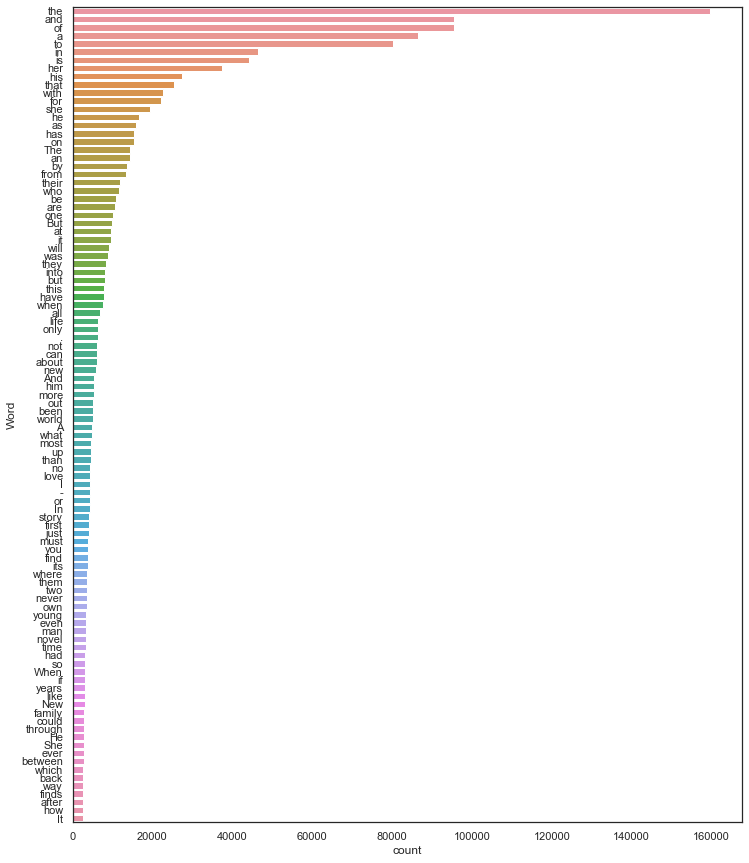

In [10]:
#Function to visualize the words and frequency in book's description.
#print 100 most frequent words 
print("Graph to visualize the words and frequency in book's description.\n\n")

def freqwords(x, terms): 
    allwords = ' '.join([text for text in x]) 
    allwords = allwords.split() 
    fdist = nltk.FreqDist(allwords) 
    wordsdf = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  
    d = wordsdf.nlargest(columns="count", n = terms) 
  
    # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()
  


freqwords(data['description'], 100)

In [11]:
y = data["genre"]
y

0        Young Adult
1            Fantasy
2           Classics
3           Classics
4        Young Adult
            ...     
21074        Fantasy
21075        Romance
21076        Mystery
21077        Fantasy
21078        Fiction
Name: genre, Length: 21079, dtype: object

In [12]:
y[5]

'Classics'

### PART 2 - İmplementing Naive Bayes
Many variants of the Naive Bayes classifier are available in the sklearn library. However, we are going to be building our own classifier from scratch using the formulas.

In [13]:
class NaiveBayesClassifier():
    def __init__(self, alpha = 1.0):
        self.alpha = alpha
        self.fit()

    def vector_sum(self, vector):
        vector_sum = 0
        for i in vector:
            vector_sum += i
        return vector_sum

    def naive_bayes_calculation(self, x_test_row):
        prob_fiction = self.fiction_ratio
        prob_fantasy = self.fantasy_ratio
        prob_young_adult = self.young_adult_ratio
        prob_romance = self.romance_ratio
        prob_mystery = self.mystery_ratio
        prob_science_fiction = self.science_fiction_ratio
        prob_history = self.history_ratio
        prob_classics = self.classics_ratio
        prob_horror = self.horror_ratio
        prob_thriller = self.thriller_ratio

        for i in np.where(x_test_row != 0):
            for j in i:
                prob_fiction *= (self.fiction_sum[j]) / (self.fiction_sum.sum())
                prob_fantasy *= (self.fantasy_sum[j]) / (self.fantasy_sum.sum())
                prob_young_adult *= (self.young_adult_sum[j]) / (self.young_adult_sum.sum())
                prob_romance *= (self.romance_sum[j]) / (self.romance_sum.sum())
                prob_mystery *= (self.mystery_sum[j]) / (self.mystery_sum.sum())
                prob_science_fiction *= (self.science_fiction_sum[j]) / (self.science_fiction_sum.sum())
                prob_history *= (self.history_sum[j]) / (self.history_sum.sum())
                prob_classics *= (self.classics_sum[j]) / (self.classics_sum.sum())
                prob_horror *= (self.horror_sum[j]) / (self.horror_sum.sum())
                prob_thriller *= (self.thriller_sum[j]) / (self.thriller_sum.sum())



        liste = [prob_fiction, prob_fantasy, prob_young_adult, prob_romance, prob_mystery, prob_science_fiction,
                 prob_history, prob_classics, prob_horror, prob_thriller]


        if(liste.index(max(liste)) == 0):
            return("Fiction")
        elif(liste.index(max(liste)) == 1):
            return("Fantasy")
        elif(liste.index(max(liste)) == 2):
            return("Young Adult")
        elif(liste.index(max(liste)) == 3):
            return("Romance")
        elif(liste.index(max(liste)) == 4):
            return("Mystery")
        elif(liste.index(max(liste)) == 5):
            return("Science Fiction")
        elif(liste.index(max(liste)) == 6):
            return("History")
        elif(liste.index(max(liste)) == 7):
            return("Classics")
        elif(liste.index(max(liste)) == 8):
            return("Horror")
        elif(liste.index(max(liste)) == 9):
            return("Thriller")

    def predict(self, x_test):# Gather all predictions in a list
        self.give_values()
        predicts = []
        for x_test_row in x_test:
            pred_value = self.naive_bayes_calculation(x_test_row)
            predicts.append(pred_value)
        return np.array(predicts)

    def give_values(self):
        fiction = list()
        fantasy = list()
        young_adult = list()
        romance = list()
        mystery = list()
        science_fiction = list()
        history = list()
        classics = list()
        horror = list()
        thriller = list()

        for i in range(len(self.y_train)):
            if self.y_train[i] == "Fiction":
                fiction.append(self.x_train[i])
            elif self.y_train[i] == "Fantasy":
                fantasy.append(self.x_train[i])
            elif self.y_train[i] == "Young Adult":
                young_adult.append(self.x_train[i])
            elif self.y_train[i] == "Romance":
                romance.append(self.x_train[i])
            elif self.y_train[i] == "Mystery":
                mystery.append(self.x_train[i])
            elif self.y_train[i] == "Science Fiction":
                science_fiction.append(self.x_train[i])
            elif self.y_train[i] == "History":
                history.append(self.x_train[i])
            elif self.y_train[i] == "Classics":
                classics.append(self.x_train[i])
            elif self.y_train[i] == "Horror":
                horror.append(self.x_train[i])
            elif self.y_train[i] == "Thriller":
                thriller.append(self.x_train[i])

        fiction = np.array(fiction)
        fantasy = np.array(fantasy)
        young_adult = np.array(young_adult)
        romance = np.array(romance)
        mystery = np.array(mystery)
        science_fiction = np.array(science_fiction)
        history = np.array(history)
        classics = np.array(classics)
        horror = np.array(horror)
        thriller = np.array(thriller)


        self.fiction_ratio = np.log(len(fiction)) / np.log(len(self.x_train))
        self.fantasy_ratio = np.log(len(fantasy)) / np.log(len(self.x_train))
        
        self.fiction_sum = np.log(self.vector_sum(fiction))
        self.fantasy_sum = np.log(self.vector_sum(fantasy))

        self.young_adult_ratio = np.log(len(young_adult)) / np.log(len(self.x_train))
        self.romance_ratio = np.log(len(romance)) / np.log(len(self.x_train))
        
        self.young_adult_sum = np.log(self.vector_sum(young_adult))
        self.romance_sum = np.log(self.vector_sum(romance))

        self.mystery_ratio = np.log(len(mystery)) / np.log(len(self.x_train))
        self.science_fiction_ratio = np.log(len(science_fiction)) / np.log(len(self.x_train))
        
        self.mystery_sum = np.log(self.vector_sum(mystery))
        self.science_fiction_sum = np.log(self.vector_sum(science_fiction))

        self.history_ratio = np.log(len(history)) / np.log(len(self.x_train))
        self.classics_ratio = np.log(len(classics)) / np.log(len(self.x_train))
        
        self.history_sum = np.log(self.vector_sum(history))
        self.classics_sum = np.log(self.vector_sum(classics))

        self.horror_ratio = np.log(len(horror)) / np.log(len(self.x_train))
        self.thriller_ratio = np.log(len(thriller)) / np.log(len(self.x_train))
        
        self.horror_sum = np.log(self.vector_sum(horror))
        self.thriller_sum = np.log(self.vector_sum(thriller))

    def fit(self, x_train = np.array([]), y_train = np.array([])):
        self.x_train = x_train + self.alpha
        self.y_train = y_train

        self.fiction_ratio = 0
        self.fiction_sum = 0

        self.fantasy_ratio = 0
        self.fantasy_sum = 0

        self.young_adult_ratio = 0
        self.young_adult_sum = 0

        self.romance_ratio = 0
        self.romance_sum = 0

        self.mystery_ratio = 0
        self.mystery_sum = 0

        self.science_fiction_ratio = 0
        self.science_fiction_sum = 0

        self.history_ratio = 0
        self.history_sum = 0

        self.classics_ratio = 0
        self.classics_sum = 0

        self.horror_ratio = 0
        self.horror_sum = 0

        self.thriller_ratio = 0
        self.thriller_sum = 0

### Bag of Words
A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.
The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.
A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:
A vocabulary of known words.
A measure of the presence of known words.
It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

•  Unigram: The occurrences of words in a document (frequency of the word).

• Bigram: The occurrences of two adjacent words in a document.


In [14]:

#Unigram
vectorizer = CountVectorizer(min_df=3,ngram_range=(1, 1)).fit(birlesik_data)
#print("Vocabulary size: ", len(vectorizer.vocabulary_))
#print("Vocabulary:\n", vectorizer.get_feature_names())
Xbow = vectorizer.fit_transform(birlesik_data).toarray()

In [15]:
#Bigram
#I take a random sample from data because I had memory issue
bigramData = birlesik_data[:4000]
vectorizer2 = CountVectorizer(min_df=3,ngram_range=(2, 2)).fit(bigramData)
#print("Vocabulary size: ", len(vectorizer2.vocabulary_))
#print("Vocabulary:\n", vectorizer2.get_feature_names())
Xbow2 = vectorizer2.fit_transform(bigramData).toarray()

In [16]:
def generate_N_grams(text,ngram=1):
    words=[word for word in text.split(" ")]
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [17]:
Values=defaultdict(int)
for text in birlesik_data:
    for word in generate_N_grams(text,1):
        Values[word]+=1
df3=pd.DataFrame(sorted(Values.items(),key=lambda x:x[1],reverse=True))

In [18]:
pd1tri=df3[0][:10]
pd2tri=df3[1][:10]

Text(0.5, 1.0, 'Top 10 words in dataframe-Unigram ANALYSIS')

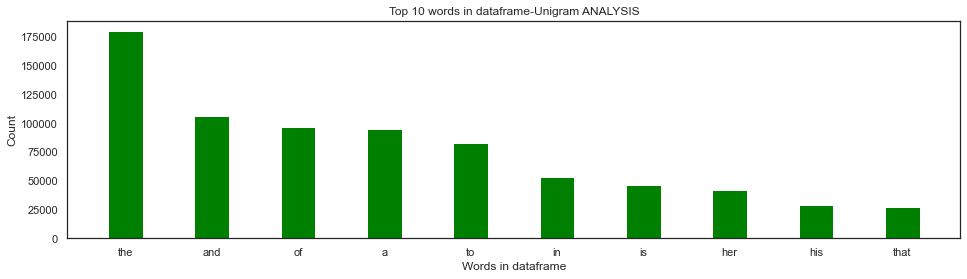

In [19]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in dataframe-Unigram ANALYSIS")

In [20]:
Values=defaultdict(int)
for text in birlesik_data:
    for word in generate_N_grams(text,2):
        Values[word]+=1
df3=pd.DataFrame(sorted(Values.items(),key=lambda x:x[1],reverse=True))

In [21]:
pd1tri=df3[0][:10]
pd2tri=df3[1][:10]

Text(0.5, 1.0, 'Top 10 words in dataframe-Bigram ANALYSIS')

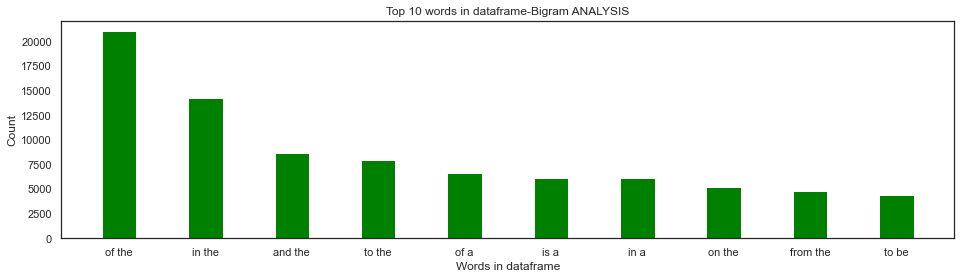

In [22]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in dataframe-Bigram ANALYSIS")

### Predicting using BOW models

In [23]:
X1 = Xbow[0:16863]
X_test1 = Xbow[16863:21079] #Splitting data 80-20 for unigram model
X2 = Xbow2[0:3200] #for bigram model
X_test2 = Xbow2[3200:]
nb_model1 = NaiveBayesClassifier()
nb_model2 = NaiveBayesClassifier()

In [24]:
nb_model1.fit(X1, y[0:16863].ravel())

In [25]:
nb_model2.fit(X2, y[0:3200].ravel())

In [26]:
y_pred1 = nb_model1.predict(X_test1)


In [27]:
y_pred2 = nb_model2.predict(X_test2) #prediction for bigram model

In [28]:
y_test1 = y[16863:21079]

In [29]:
y_test2 = y[3200:4000]

In [30]:
print(classification_report(y_test1, y_pred1)) #unigram classification report

                 precision    recall  f1-score   support

       Classics       0.00      0.00      0.00       120
        Fantasy       0.14      0.00      0.01       826
        Fiction       0.19      0.65      0.30       858
        History       0.21      0.30      0.24       237
         Horror       0.00      0.00      0.00       120
        Mystery       0.00      0.00      0.00       543
        Romance       0.26      0.02      0.04       735
Science Fiction       0.00      0.00      0.00       273
       Thriller       0.02      0.17      0.03        90
    Young Adult       0.00      0.00      0.00       414

       accuracy                           0.16      4216
      macro avg       0.08      0.11      0.06      4216
   weighted avg       0.12      0.16      0.08      4216



Accuracy is too low because there is lots of common words and I hadn't cleaned them yet. Actually I didn't expect this low.

In [31]:
print(classification_report(y_test2, y_pred2)) #bigram classification report

                 precision    recall  f1-score   support

       Classics       0.00      0.00      0.00        43
        Fantasy       0.44      0.35      0.39       212
        Fiction       0.28      0.94      0.43       188
        History       0.00      0.00      0.00        18
         Horror       0.00      0.00      0.00        25
        Mystery       0.00      0.00      0.00        47
        Romance       0.00      0.00      0.00        82
Science Fiction       0.00      0.00      0.00        41
       Thriller       0.00      0.00      0.00        13
    Young Adult       0.83      0.04      0.07       131

       accuracy                           0.32       800
      macro avg       0.16      0.13      0.09       800
   weighted avg       0.32      0.32      0.22       800



It's accuracy is more higher because I got an RAM issue (despite I changed it 8GB to 16GB yesterday :( ) and I decided to get a sample from data. Maybe sampled data has more specific words than actual data

In [32]:
data[:3200].groupby('genre').count() #Here is you see the distribution of sampled data I used.

,title,author,description,coverImg
genre,,,,
Classics,367,367,367,367
Fantasy,806,806,806,806
Fiction,860,860,860,860
History,32,32,32,32
Horror,117,117,117,117
Mystery,129,129,129,129
Romance,206,206,206,206
Science Fiction,153,153,153,153
Thriller,32,32,32,32


### Frequiencies

In [33]:
def frequencies(words_list):
    freqs = {}
    for i in words_list:
        for j in i:
            if j not in freqs:
                freqs[j] = 0
            else:
                freqs[j] += 1
    return freqs

In [34]:
def most_frequent_words(dictionary, value_number):
    liste = sorted(dictionary, key=dictionary.get, reverse=True)[:value_number]
    dictt = {}
    for i in range(len(liste)):
        dictt[liste[i]]= dictionary.get(liste[i])
    return dictt

In [35]:

tokens =birlesik_data.apply(word_tokenize)

In [36]:
tokens.head()

0    [winning, means, fame, and, fortune, losing, m...
1    [there, is, a, door, at, the, end, of, a, sile...
2    [the, unforgettable, novel, of, a, childhood, ...
3    [alternate, cover, edition, of, isbn, since, i...
4    [about, three, things, i, was, absolutely, pos...
Name: description, dtype: object

In [37]:
y = data["genre"]

In [38]:
ClassicsSet = list()
FantasySet = list()
FictionSet = list()
HistorySet = list()
HorrorSet = list()
MysterySet = list()
RomanceSet = list()
ScienceFictionSet = list()
ThrillerSet = list()
YoungAdultSet = list()

In [39]:
for i in range(len(tokens)):
    if y[i] == "Classics":
        ClassicsSet.append(tokens[i])
    elif y[i] == "Fantasy":
        FantasySet.append(tokens[i]) 
    elif y[i] == "Fiction":
        FictionSet.append(tokens[i]) 
    elif y[i] == "History":
        HistorySet.append(tokens[i]) 
    elif y[i] == "Horror":
        HorrorSet.append(tokens[i])
    elif y[i] == "Mystery":
        MysterySet.append(tokens[i])
    elif y[i] == "Romance":
        RomanceSet.append(tokens[i]) 
    elif y[i] == "Science Fiction":
        ScienceFictionSet.append(tokens[i]) 
    elif y[i] == "Thriller":
        ThrillerSet.append(tokens[i])
    elif y[i] == "Young Adult":
        YoungAdultSet.append(tokens[i])

#### Displaying the 10 most frequent values for each category

In [40]:
Classics_freqs = frequencies(ClassicsSet)
most_frequent_words(Classics_freqs,10)


{'the': 7245,
 'of': 4948,
 'and': 4126,
 'a': 2958,
 'in': 2208,
 'to': 1987,
 'is': 1337,
 'his': 1104,
 'with': 836,
 'as': 835}

In [41]:
History_freqs = frequencies(HistorySet)
most_frequent_words(History_freqs,10)

{'the': 10177,
 'of': 6555,
 'and': 5207,
 'a': 3035,
 'in': 2740,
 'to': 2649,
 'that': 1070,
 'as': 1049,
 'is': 943,
 'his': 907}

In [42]:
Mystery_freqs = frequencies(MysterySet)
most_frequent_words(Mystery_freqs,10)

{'the': 14932,
 'a': 9035,
 'and': 7767,
 'of': 7111,
 'to': 6879,
 'in': 4501,
 'is': 4171,
 'her': 3751,
 'his': 2265,
 'that': 2204}

In [43]:
Romance_freqs = frequencies(RomanceSet)
most_frequent_words(Romance_freqs,10)

{'the': 19730,
 'to': 14502,
 'and': 14303,
 'a': 13345,
 'her': 10474,
 'of': 9673,
 'in': 6875,
 'is': 6815,
 'she': 6620,
 'he': 5420}

In [44]:
Thriller_freqs = frequencies(ThrillerSet)
most_frequent_words(Thriller_freqs,10)

{'the': 4094,
 'a': 2606,
 'and': 2113,
 'of': 1890,
 'to': 1887,
 'in': 1191,
 'is': 1162,
 'that': 753,
 'her': 707,
 'his': 698}

### PART 3- Error Analysis

In [45]:
y_test=tuple(y_test1)
a=pd.DataFrame(y_test, columns=["GenreOrj"])
b=pd.DataFrame(y_pred1, columns=["GenrePredicted"])

In [46]:
c = pd.concat([a, b], axis=1, join='inner')
c.head(15)

,GenreOrj,GenrePredicted
0,Horror,Thriller
1,Fiction,History
2,Fiction,Fiction
3,Fantasy,Thriller
4,Science Fiction,Thriller
5,Fantasy,Thriller
6,Mystery,Fiction
7,Romance,Fiction
8,Mystery,Fiction
9,Fiction,Fiction


In [47]:
#As you see; 0th, 4th, 6th books are missclasified. Let's check why.

In [48]:

Counter(tokens[16863]).most_common(20)
# the most common words are;

[('s', 6),
 ('becka', 5),
 ('honey', 4),
 ('she', 4),
 ('best', 3),
 ('in', 3),
 ('friend', 3),
 ('more', 3),
 ('to', 2),
 ('the', 2),
 ('but', 2),
 ('does', 2),
 ('want', 2),
 ('friends', 1),
 ('end', 1),
 ('who', 1),
 ('is', 1),
 ('perkins', 1),
 ('been', 1),
 ('telling', 1)]

It predicted as Romance because its most frequent words(like friend, honey,,,)-after stopwords- are more common and similar to Romance. 


In [49]:
Counter(tokens[16867]).most_common(20)
# the most common words are;;

[('in', 3),
 ('an', 2),
 ('he', 2),
 ('another', 2),
 ('peter', 1),
 ('sinclair', 1),
 ('is', 1),
 ('tormented', 1),
 ('by', 1),
 ('bereavement', 1),
 ('and', 1),
 ('failure', 1),
 ('attempt', 1),
 ('to', 1),
 ('conjure', 1),
 ('some', 1),
 ('meaning', 1),
 ('from', 1),
 ('his', 1),
 ('life', 1)]

It is given as science fiction but predicted as fiction.

The words like life, story and man classified this book as fiction.

In [50]:
Counter(tokens[16869]).most_common(20)
# the most common words are;

[('a', 6),
 ('the', 6),
 ('of', 4),
 ('alex', 3),
 ('into', 3),
 ('past', 2),
 ('sharon', 2),
 ('an', 2),
 ('him', 2),
 ('that', 2),
 ('and', 2),
 ('at', 1),
 ('party', 1),
 ('for', 1),
 ('controversial', 1),
 ('los', 1),
 ('angeles', 1),
 ('sex', 1),
 ('therapist', 1),
 ('encounters', 1)]

It is given as mystery but predicted as science fiction. There is not much specific words. Apperantly my code classified it with calculating the occurances 

###### The main reason for classifying Fiction or Romance instead of Science fiction, Mystery vs. my dataset is not distributed clearly on categories. That's why the word frequencies are a lot more if compared with others.

### TF-IDF
Term Frequency (TF)
The number of times a word appears in a document divided by the total number of words in the document. Every document has its own term frequency.

Inverse Data Frequency (IDF)
The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.

In [51]:
Classics_Data = data[data["genre"] == "Classics"].drop(columns=["title","author","coverImg","genre"]).squeeze()
Fantasy_Data = data[data["genre"] == "Fantasy"].drop(columns=["title","author","coverImg","genre"]).squeeze()
Fiction_Data = data[data["genre"] == "Fiction"].drop(columns=["title","author","coverImg","genre"]).squeeze()
History_Data = data[data["genre"] == "History"].drop(columns=["title","author","coverImg","genre"]).squeeze()
Horror_Data = data[data["genre"] == "Horror"].drop(columns=["title","author","coverImg","genre"]).squeeze()
Mystery_Data = data[data["genre"] == "Mystery"].drop(columns=["title","author","coverImg","genre"]).squeeze()
Romance_Data = data[data["genre"] == "Romance"].drop(columns=["title","author","coverImg","genre"]).squeeze()
ScienceFiction_Data = data[data["genre"] == "Science Fiction"].drop(columns=["title","author","coverImg","genre"]).squeeze()
Thriller_Data = data[data["genre"] == "Thriller"].drop(columns=["title","author","coverImg","genre"]).squeeze()
YoungAdult_Data = data[data["genre"] == "Young Adult"].drop(columns=["title","author","coverImg","genre"]).squeeze()
birlesik_data2 = birlesik_data.squeeze()

In [52]:
count1 = CountVectorizer()
count2 = CountVectorizer()
count3 = CountVectorizer()
count4 = CountVectorizer()
count5 = CountVectorizer()
count6 = CountVectorizer()
count7 = CountVectorizer()
count8 = CountVectorizer()
count9 = CountVectorizer()
count10 = CountVectorizer()
count11 = CountVectorizer()

In [53]:
# get tf-df values
resultClassic = count1.fit_transform(Classics_Data)
resultFantasy = count2.fit_transform(Fantasy_Data)
resultFiction = count3.fit_transform(Fiction_Data)
resultHistory = count4.fit_transform(History_Data)
resultHorror = count5.fit_transform(Horror_Data)
resultMystery = count6.fit_transform(Mystery_Data)
resultRomance = count7.fit_transform(Romance_Data)
resultScienceFiction = count8.fit_transform(ScienceFiction_Data)
resultThriller = count9.fit_transform(Thriller_Data)
resultYoungAdult = count10.fit_transform(YoungAdult_Data)
resultBirlesikData = count11.fit_transform(birlesik_data2)

In [54]:
print(resultClassic)

  (0, 12900)	4
  (0, 13518)	1
  (0, 8927)	1
  (0, 9032)	4
  (0, 2386)	1
  (0, 6629)	4
  (0, 11941)	1
  (0, 12100)	1
  (0, 13140)	1
  (0, 860)	9
  (0, 3167)	1
  (0, 2855)	1
  (0, 12898)	1
  (0, 11105)	1
  (0, 7011)	4
  (0, 13058)	6
  (0, 7281)	2
  (0, 8428)	2
  (0, 1481)	1
  (0, 1794)	1
  (0, 845)	2
  (0, 6834)	1
  (0, 1594)	1
  (0, 3171)	1
  (0, 12485)	1
  :	:
  (875, 6629)	1
  (875, 1771)	1
  (875, 6986)	2
  (875, 9086)	1
  (875, 7974)	1
  (875, 12973)	1
  (875, 14120)	1
  (875, 14244)	1
  (875, 9140)	1
  (875, 5790)	1
  (875, 2313)	1
  (875, 2472)	1
  (875, 4764)	1
  (875, 14380)	1
  (875, 7734)	1
  (875, 13068)	1
  (875, 450)	1
  (875, 11499)	1
  (875, 12419)	1
  (875, 9730)	1
  (875, 5058)	1
  (875, 63)	1
  (875, 11165)	1
  (875, 2437)	1
  (875, 6063)	1


In [55]:
print(resultClassic.shape)

(876, 14517)


In [56]:
#in Classics genre, We had taken 876 sentences, and there are 14517 unique words, so the shape is 876/14517.

In [57]:
tfidf1_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf1_transformer.fit(resultClassic)
tfidf2_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf2_transformer.fit(resultFantasy)
tfidf3_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf3_transformer.fit(resultFiction)
tfidf4_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf4_transformer.fit(resultHistory)
tfidf5_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf5_transformer.fit(resultHorror)
tfidf6_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf6_transformer.fit(resultMystery)
tfidf7_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf7_transformer.fit(resultRomance)
tfidf8_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf8_transformer.fit(resultScienceFiction)
tfidf9_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf9_transformer.fit(resultThriller)
tfidf10_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf10_transformer.fit(resultYoungAdult)
tfidf11_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf11_transformer.fit(resultBirlesikData)
df_idfCls = (pd.DataFrame(tfidf1_transformer.idf_, index=count1.get_feature_names(),columns=["idf_weights"])).sort_values(by=['idf_weights'],ascending = True)
df_idfFnt = (pd.DataFrame(tfidf2_transformer.idf_, index=count2.get_feature_names(),columns=["idf_weights"])).sort_values(by=['idf_weights'],ascending = True)
df_idfFc = (pd.DataFrame(tfidf3_transformer.idf_, index=count3.get_feature_names(),columns=["idf_weights"])).sort_values(by=['idf_weights'],ascending = True)
df_idfHs = (pd.DataFrame(tfidf4_transformer.idf_, index=count4.get_feature_names(),columns=["idf_weights"])).sort_values(by=['idf_weights'],ascending = True)
df_idfHr = (pd.DataFrame(tfidf5_transformer.idf_, index=count5.get_feature_names(),columns=["idf_weights"])).sort_values(by=['idf_weights'],ascending = True)
df_idfMy = (pd.DataFrame(tfidf6_transformer.idf_, index=count6.get_feature_names(),columns=["idf_weights"])).sort_values(by=['idf_weights'],ascending = True)
df_idfRm = (pd.DataFrame(tfidf7_transformer.idf_, index=count7.get_feature_names(),columns=["idf_weights"])).sort_values(by=['idf_weights'],ascending = True)
df_idfSf = (pd.DataFrame(tfidf8_transformer.idf_, index=count8.get_feature_names(),columns=["idf_weights"])).sort_values(by=['idf_weights'],ascending = True)
df_idfTh = (pd.DataFrame(tfidf9_transformer.idf_, index=count9.get_feature_names(),columns=["idf_weights"])).sort_values(by=['idf_weights'],ascending = True)
df_idfYa = (pd.DataFrame(tfidf10_transformer.idf_, index=count10.get_feature_names(),columns=["idf_weights"])).sort_values(by=['idf_weights'],ascending = True)
df_idBirlesikData = (pd.DataFrame(tfidf11_transformer.idf_, index=count11.get_feature_names(),columns=["idf_weights"])).sort_values(by=['idf_weights'],ascending = True)


#### Stopwords Cleaning Code

In [58]:

nltk.download('wordnet')

stop_words = ENGLISH_STOP_WORDS
# function to remove stopwords
def removestopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

#I add the letters one by one because when I delete the stopwords there could be letters remaining.

# function to remove stopwords
def removeletters(text):
    words = {'a', 'b','c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm','n','o','p','r','s','t','u','v','w','x','y','z'}
    no_stopword_text = [w for w in text.split() if not w in words]
    return ' '.join(no_stopword_text)

def lematizing(sentence):
    stemSentence = ""
    
    lemma=WordNetLemmatizer()

    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
def preproccesser(birlesik_data):
    birlesik_data=birlesik_data.apply(lambda x: clean(x))
    birlesik_data = birlesik_data.apply(lambda x: removestopwords(x))
    birlesik_data = birlesik_data.apply(lambda x: removeletters(x))
    birlesik_data = birlesik_data.apply(lambda x: lematizing(x))
    return birlesik_data

### PART 4 - Modul Analysis
#### 4-a

In [60]:
df_idfCls.head(11)

,idf_weights
the,1.030095
of,1.059912
and,1.086908
in,1.156434
to,1.232595
is,1.340357
with,1.582102
his,1.636622
for,1.649638
as,1.669484


In [61]:
df_idfRm.head(11)

,idf_weights
the,1.022252
and,1.031516
to,1.038990
of,1.092932
in,1.153730
is,1.198469
her,1.208195
but,1.248998
for,1.273355
she,1.285760


In [62]:
df_idfSf.head(11)

,idf_weights
the,1.022728
of,1.062080
and,1.086282
to,1.114678
in,1.206036
is,1.297900
that,1.468400
for,1.519693
on,1.601199
with,1.612981


In [63]:
df_idBirlesikData.head(11)

,idf_weights
the,1.020464
and,1.047406
of,1.067960
to,1.094144
in,1.157175
is,1.228852
with,1.452100
that,1.455910
for,1.471599
but,1.518126


In [64]:
birlesik_data2 = birlesik_data
birlesik_data2 = preproccesser(birlesik_data2)
tokens2 =birlesik_data2.apply(word_tokenize)
freqs = frequencies(tokens2)
most_frequent_words(freqs,10)

{'life': 13436,
 'new': 9465,
 'world': 9433,
 'love': 8093,
 'year': 7661,
 'time': 7559,
 'story': 6838,
 'novel': 5554,
 'family': 5259,
 'book': 5063}

As you see, some of the words like "the, of, and, to, in, is, with, that, for, but" are the most common words in data and they are making it difficult to predict because they are in every genre. After we clean them with stop-words cleaning at the next stage, we will see that predicting genre is will be easier than before.
After stopwords cleaning, there will be "life, new, world, love, year, time, story, novel, family, book" like words and they are also most common words in all genres and their absance is make the prediction easier. I will narrow down my dictionary with dropping that words.

In [65]:
def removewords(text):
    words = {"life", "new","world", "love", "year", "time", "story", "novel", "family", "book","man", "come", "just", }
    no_stopword_text = [w for w in text.split() if not w in words]
    return ' '.join(no_stopword_text)
birlesik_data = birlesik_data.apply(lambda x: removewords(x))


In [66]:
birlesik_data2 = birlesik_data
birlesik_data2 = preproccesser(birlesik_data2)
tokens2 =birlesik_data2.apply(word_tokenize)
freqs = frequencies(tokens2)
most_frequent_words(freqs,10)

{'secret': 4858,
 'friend': 4645,
 'know': 4419,
 'year': 4385,
 'old': 4315,
 'woman': 4250,
 'way': 4064,
 'young': 3843,
 'like': 3764,
 'make': 3759}

In [67]:
ClassicsSet2 = list()
FantasySet2 = list()
FictionSet2 = list()
HistorySet2 = list()
HorrorSet2 = list()
MysterySet2 = list()
RomanceSet2 = list()
ScienceFictionSet2 = list()
ThrillerSet2 = list()
YoungAdultSet2 = list()

In [68]:
for i in range(len(tokens2)):
    if y[i] == "Classics":
        ClassicsSet2.append(tokens2[i])
    elif y[i] == "Fantasy":
        FantasySet2.append(tokens2[i]) 
    elif y[i] == "Fiction":
        FictionSet2.append(tokens2[i]) 
    elif y[i] == "History":
        HistorySet2.append(tokens2[i]) 
    elif y[i] == "Horror":
        HorrorSet2.append(tokens2[i])
    elif y[i] == "Mystery":
        MysterySet2.append(tokens2[i])
    elif y[i] == "Romance":
        RomanceSet2.append(tokens2[i]) 
    elif y[i] == "Science Fiction":
        ScienceFictionSet2.append(tokens2[i]) 
    elif y[i] == "Thriller":
        ThrillerSet2.append(tokens2[i])
    elif y[i] == "Young Adult":
        YoungAdultSet2.append(tokens2[i])

In [69]:
Classics_freqs = frequencies(ClassicsSet2)
most_frequent_words(Classics_freqs,10)

{'tale': 293,
 'work': 287,
 'adventure': 246,
 'classic': 241,
 'edition': 227,
 'young': 194,
 'century': 180,
 'woman': 176,
 'story': 175,
 'reader': 163}

In [70]:
Fantasy_freqs = frequencies(FantasySet2)
most_frequent_words(Fantasy_freqs,10)

{'magic': 1567,
 'power': 1469,
 'secret': 1167,
 'king': 994,
 'friend': 989,
 'old': 977,
 'dark': 954,
 'land': 943,
 'know': 930,
 'young': 927}

In [71]:
Fiction_freqs = frequencies(FictionSet2)
most_frequent_words(Fiction_freqs,10)

{'woman': 1366,
 'young': 1279,
 'year': 1130,
 'old': 1091,
 'life': 984,
 'day': 916,
 'mother': 905,
 'secret': 889,
 'work': 885,
 'war': 873}

Here as you can see, after narrowing down my dictionary, some specific words for genres appears. For example; "tale, adventure, classic" words are specific for Classics genre, "magic, power, secret, king" words are specific for Fantasy genre and "woman, young, secret" words are specific for Fiction genre.

#### Tfidf model fitting

In [72]:
nb_model3 = NaiveBayesClassifier()
nb_model3.fit()

In [73]:
tfidf = TfidfVectorizer(min_df = 3, lowercase = True,max_features= 21, sublinear_tf = True)

In [74]:
feature = tfidf.fit_transform(birlesik_data).toarray()

In [75]:
X3 = feature[0:16863]
X_test3 = feature[16863:21079]

In [76]:
nb_model3.fit(X3, y[0:16863].ravel())

In [77]:
y_pred3 = nb_model3.predict(X_test3)

In [78]:
print(classification_report(y_test, y_pred3))

                 precision    recall  f1-score   support

       Classics       0.00      0.00      0.00       120
        Fantasy       0.20      0.30      0.24       826
        Fiction       0.24      0.83      0.37       858
        History       0.00      0.00      0.00       237
         Horror       0.00      0.00      0.00       120
        Mystery       0.00      0.00      0.00       543
        Romance       0.00      0.00      0.00       735
Science Fiction       0.00      0.00      0.00       273
       Thriller       0.00      0.00      0.00        90
    Young Adult       0.00      0.00      0.00       414

       accuracy                           0.23      4216
      macro avg       0.04      0.11      0.06      4216
   weighted avg       0.09      0.23      0.12      4216



If you have more instances in one class, the good word features of the frequent class risk having lower IDF, thus their best features will have a lower weight. Since I have a dataset which hasn't good distribution, my TF-IDF accuracy is low.

#### 4-b
#### From now on, I will do the stop-word cleaning and do all again to observe results

I found common words like ‘a’, ‘to’, ‘are’ and others in my list in Part 2 (4.a).
These are called stop words. I will remove them with my preprocesser function

In [79]:
birlesik_data = preproccesser(birlesik_data)
birlesik_data

0        winning mean fame fortune losing mean certain ...
1        door end silent corridor haunting harry pottte...
2        unforgettable childhood sleepy southern town c...
3        alternate cover edition isbn immediate success...
4        thing absolutely positive edward vampire secon...
                               ...                        
21074    seventeen old kara nightingale suddenly struck...
21075    lilah lopez dresers town care unfinished busin...
21076    anasazi sequel thirteenth chime emma michael a...
21077    reader favorite award winner sixteen old kara ...
21078    powerful tremor unearths ancient secretburied ...
Name: description, Length: 21079, dtype: object

In [80]:
Fantasy_freqs = frequencies(FantasySet2)
most_frequent_words(Fantasy_freqs,10)

{'magic': 1567,
 'power': 1469,
 'secret': 1167,
 'king': 994,
 'friend': 989,
 'old': 977,
 'dark': 954,
 'land': 943,
 'know': 930,
 'young': 927}

In [81]:
Mystery_freqs = frequencies(MysterySet2)
most_frequent_words(Mystery_freqs,10)

{'murder': 743,
 'killer': 608,
 'case': 575,
 'mystery': 568,
 'secret': 567,
 'detective': 497,
 'woman': 486,
 'old': 475,
 'death': 461,
 'crime': 443}

Theese are 10 non-stop words that most strongly predict that the book genre is ’Fantasy’ and the 10 non-stop words that most strongly predict that the book genre is ’Mystery’.


#### 4-c

Stop words are available in abundance in any human language. By removing these words, we remove the low-level information from our text in order to give more focus to the important information. We should remove these tokens only if they don’t add any new information for our problem. But removing stop words not always a good idea. In the context of sentiment analysis, removing stop words can be problematic if context is affected. For example suppose your stop word corpus includes ‘not’, which is a negation that can alter the valence of the passage. So you have to be cautious of exactly what is being dropped and what consequences it can have.

In [82]:

#BAG OF WORDS
#There’s a parameter called min_df that basically removes words that appear less than 3 times
#Unigram
vectorizer = CountVectorizer(min_df=3,ngram_range=(1, 1)).fit(birlesik_data)
#print("Vocabulary size: ", len(vectorizer.vocabulary_))
#print("Vocabulary:\n", vectorizer.get_feature_names())
Xbow = vectorizer.fit_transform(birlesik_data).toarray()


In [83]:
#Bigram
#I take a random sample from data because I had memory issue
bigramData = birlesik_data[:4000]
vectorizer2 = CountVectorizer(min_df=3,ngram_range=(2, 2)).fit(bigramData)
#print("Vocabulary size: ", len(vectorizer2.vocabulary_))
#print("Vocabulary:\n", vectorizer2.get_feature_names())
Xbow2 = vectorizer2.fit_transform(bigramData).toarray()


In [84]:
X1 = Xbow[0:16863]
X_test1 = Xbow[16863:21079] #Splitting data 80-20 for unigram model

nb_model1 = NaiveBayesClassifier()
nb_model2 = NaiveBayesClassifier()

In [85]:
X2 = Xbow2[0:3200] #for bigram model
X_test2 = Xbow2[3200:]

In [86]:
nb_model1.fit(X1, y[0:16863].ravel())

In [87]:
nb_model2.fit(X2, y[0:3200].ravel())

In [88]:
y_pred1 = nb_model1.predict(X_test1)

In [89]:
y_pred2 = nb_model2.predict(X_test2)

In [90]:
y_test1 = y[16863:21079]
y_test2 = y[3200:4000]
print("unigram classification report for stop-words cleaned data")
print(classification_report(y_test1, y_pred1)) 

unigram classification report for stop-words cleaned data
                 precision    recall  f1-score   support

       Classics       1.00      0.01      0.02       120
        Fantasy       0.46      0.68      0.55       826
        Fiction       0.32      0.78      0.45       858
        History       0.87      0.22      0.36       237
         Horror       0.00      0.00      0.00       120
        Mystery       0.81      0.15      0.25       543
        Romance       0.64      0.45      0.53       735
Science Fiction       0.83      0.04      0.07       273
       Thriller       1.00      0.01      0.02        90
    Young Adult       0.58      0.31      0.41       414

       accuracy                           0.43      4216
      macro avg       0.65      0.26      0.27      4216
   weighted avg       0.58      0.43      0.39      4216



In [91]:
print("bigram classification report for stop-words cleaned data")
print(classification_report(y_test2, y_pred2)) 

bigram classification report for stop-words cleaned data
                 precision    recall  f1-score   support

       Classics       0.00      0.00      0.00        43
        Fantasy       0.75      0.01      0.03       212
        Fiction       0.24      1.00      0.38       188
        History       0.00      0.00      0.00        18
         Horror       0.00      0.00      0.00        25
        Mystery       0.00      0.00      0.00        47
        Romance       0.00      0.00      0.00        82
Science Fiction       0.00      0.00      0.00        41
       Thriller       0.00      0.00      0.00        13
    Young Adult       0.00      0.00      0.00       131

       accuracy                           0.24       800
      macro avg       0.10      0.10      0.04       800
   weighted avg       0.25      0.24      0.10       800



Here you can see the effect of narrowing down the dictionary and cleaning stopwords on accuracies. I didn't find out why the bigram accuracy get low but I tought that maybe because of sample distribution, it used the stopwords as spesific genre words.

In [92]:
nb_model3 = NaiveBayesClassifier()
nb_model3.fit()

In [93]:
tfidf = TfidfVectorizer(min_df = 3, lowercase = True,max_features= 21, sublinear_tf = True)

In [94]:
feature = tfidf.fit_transform(birlesik_data).toarray()

In [95]:
X3 = feature[0:16863]
X_test3 = feature[16863:21079]

In [96]:
nb_model3.fit(X3, y[0:16863].ravel())

In [97]:
y_pred3 = nb_model3.predict(X_test3)

In [98]:
print("tf-idf classification report for stop-words cleaned data")
print(classification_report(y_test, y_pred3))

tf-idf classification report for stop-words cleaned data
                 precision    recall  f1-score   support

       Classics       0.00      0.00      0.00       120
        Fantasy       0.28      0.33      0.30       826
        Fiction       0.23      0.86      0.36       858
        History       0.00      0.00      0.00       237
         Horror       0.00      0.00      0.00       120
        Mystery       0.00      0.00      0.00       543
        Romance       0.00      0.00      0.00       735
Science Fiction       0.00      0.00      0.00       273
       Thriller       0.00      0.00      0.00        90
    Young Adult       0.00      0.00      0.00       414

       accuracy                           0.24      4216
      macro avg       0.05      0.12      0.07      4216
   weighted avg       0.10      0.24      0.13      4216



### PART 5 -  Calculation of Accuracy
I calculated my model accuracies throughout my notebook but I also tabularized all of them for you.

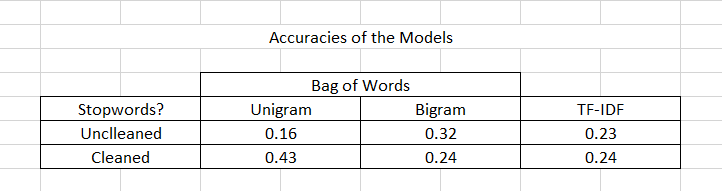

Thanks for giving time.